<a href="https://colab.research.google.com/github/siva0124/HUNTER-C/blob/main/skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
45/45 ━━━━━━━━━━━━━━━━━━━━ 255s 6s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step
Validation Accuracy: 0.9220
Test Accuracy: 0.9220
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       106
           1       0.91      0.93      0.92        99

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



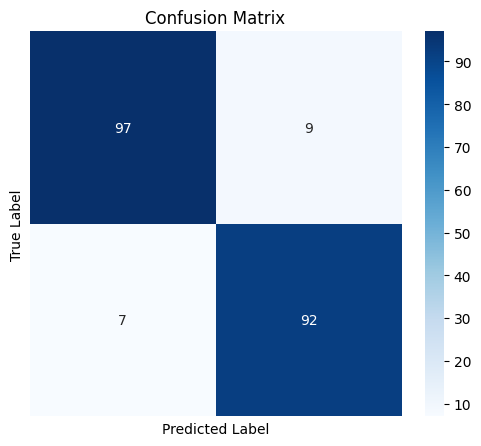

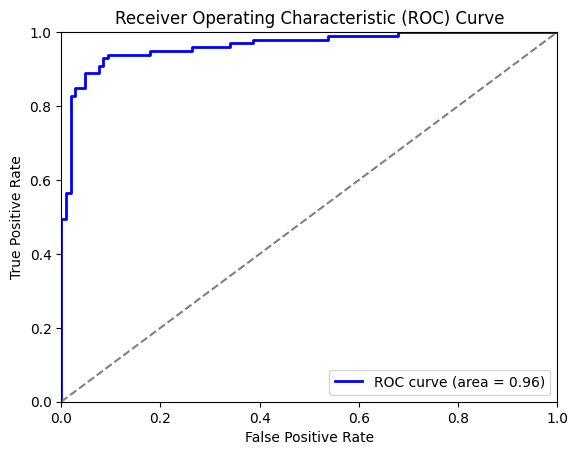

In [3]:
##svm Methodology
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

# Paths
test_images_path = "/content/drive/MyDrive/skin cancer detection/test/images"
test_labels_path = "/content/drive/MyDrive/skin cancer detection/test/labels"
train_images_path = "/content/drive/MyDrive/skin cancer detection/train/images"
train_labels_path = "/content/drive/MyDrive/skin cancer detection/train/labels"
valid_images_path = "/content/drive/MyDrive/skin cancer detection/valid/images"
valid_labels_path = "/content/drive/MyDrive/skin cancer detection/valid/labels"

# Load labels
def load_labels(labels_dir):
    labels = []
    label_files = sorted(os.listdir(labels_dir))
    for label_file in label_files:
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as file:
            first_value = file.read().strip().split()[0]  # Extract the first value
            labels.append(int(float(first_value)))  # Convert to integer
    return np.array(labels)

# Load images and extract features using ResNet50
def load_images_and_extract_features(images_path, labels_path, model):
    images = []
    labels = load_labels(labels_path)
    image_files = sorted(os.listdir(images_path))
    for img_name in image_files:
        img_path = os.path.join(images_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
    images = np.array(images)
    features = model.predict(images)
    return features, labels

# Load pre-trained ResNet50 model for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Load training data
X_train, y_train = load_images_and_extract_features(train_images_path, train_labels_path, feature_extractor)
# Load validation data
X_valid, y_valid = load_images_and_extract_features(valid_images_path, valid_labels_path, feature_extractor)
# Load test data
X_test, y_test = load_images_and_extract_features(test_images_path, test_labels_path, feature_extractor)

# Train SVM classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Evaluate on validation set
y_valid_pred = svm.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.4f}')

# Evaluate on test set
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix as Image without class labels
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=False, yticklabels=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_test_prob = svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
45/45 ━━━━━━━━━━━━━━━━━━━━ 238s 5s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step
Validation Accuracy: 0.9220
Test Accuracy: 0.9122
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       106
           1       0.97      0.85      0.90        99

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205



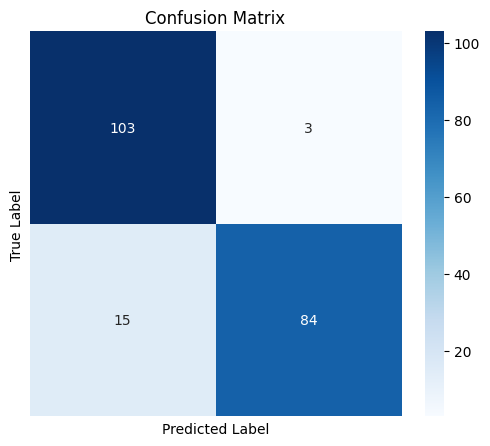

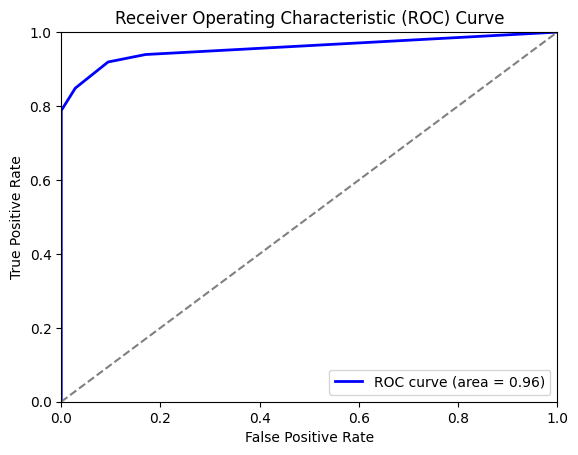

In [4]:
#KNN Methodology
from google.colab import drive
drive.mount('/content/drive')
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

# Paths
test_images_path = "/content/drive/MyDrive/skin cancer detection/test/images"
test_labels_path = "/content/drive/MyDrive/skin cancer detection/test/labels"
train_images_path = "/content/drive/MyDrive/skin cancer detection/train/images"
train_labels_path = "/content/drive/MyDrive/skin cancer detection/train/labels"
valid_images_path = "/content/drive/MyDrive/skin cancer detection/valid/images"
valid_labels_path = "/content/drive/MyDrive/skin cancer detection/valid/labels"

# Load labels
def load_labels(labels_dir):
    labels = []
    label_files = sorted(os.listdir(labels_dir))
    for label_file in label_files:
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as file:
            first_value = file.read().strip().split()[0]  # Extract first value
            labels.append(int(float(first_value)))  # Convert to integer
    return np.array(labels)

# Load images and extract features using ResNet50
def load_images_and_extract_features(images_path, labels_path, model):
    images = []
    labels = load_labels(labels_path)
    image_files = sorted(os.listdir(images_path))
    for img_name in image_files:
        img_path = os.path.join(images_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
    images = np.array(images)
    features = model.predict(images)
    return features, labels

# Load pre-trained ResNet50 model for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Load training data
X_train, y_train = load_images_and_extract_features(train_images_path, train_labels_path, feature_extractor)
# Load validation data
X_valid, y_valid = load_images_and_extract_features(valid_images_path, valid_labels_path, feature_extractor)
# Load test data
X_test, y_test = load_images_and_extract_features(test_images_path, test_labels_path, feature_extractor)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_valid_pred = knn.predict(X_valid_scaled)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.4f}')

# Evaluate on test set
y_test_pred = knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix without class labels
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=False, yticklabels=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_test_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
45/45 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step
Validation Accuracy: 0.9171
Test Accuracy: 0.9268
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       106
           1       0.92      0.93      0.92        99

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



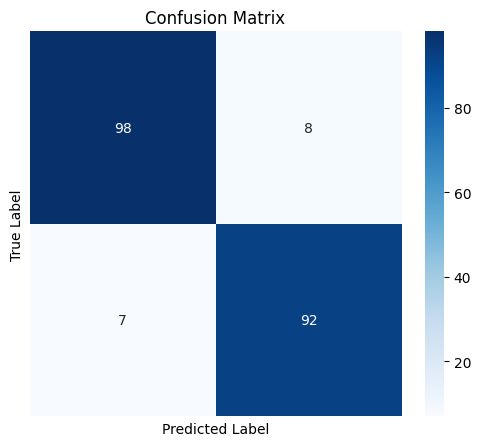

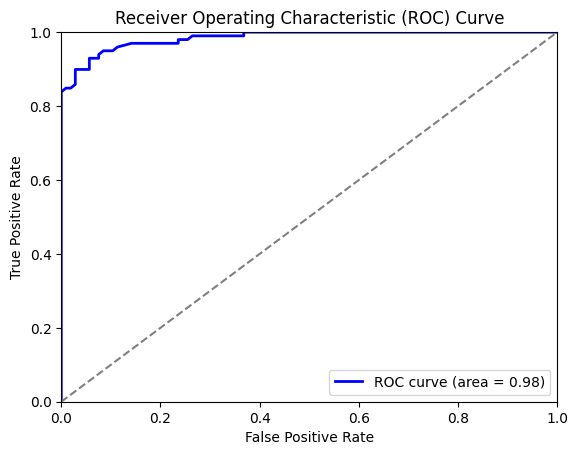

In [5]:
#Random Forest Methodology
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

# Paths
test_images_path = "/content/drive/MyDrive/skin cancer detection/test/images"
test_labels_path = "/content/drive/MyDrive/skin cancer detection/test/labels"
train_images_path = "/content/drive/MyDrive/skin cancer detection/train/images"
train_labels_path = "/content/drive/MyDrive/skin cancer detection/train/labels"
valid_images_path = "/content/drive/MyDrive/skin cancer detection/valid/images"
valid_labels_path = "/content/drive/MyDrive/skin cancer detection/valid/labels"

# Load labels
def load_labels(labels_dir):
    labels = []
    label_files = sorted(os.listdir(labels_dir))
    for label_file in label_files:
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as file:
            first_value = file.read().strip().split()[0]  # Extract first value
            labels.append(int(float(first_value)))  # Convert to integer
    return np.array(labels)

# Load images and extract features using ResNet50
def load_images_and_extract_features(images_path, labels_path, model):
    images = []
    labels = load_labels(labels_path)
    image_files = sorted(os.listdir(images_path))
    for img_name in image_files:
        img_path = os.path.join(images_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
    images = np.array(images)
    features = model.predict(images)
    return features, labels

# Load pre-trained ResNet50 model for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Load datasets
X_train, y_train = load_images_and_extract_features(train_images_path, train_labels_path, feature_extractor)
X_valid, y_valid = load_images_and_extract_features(valid_images_path, valid_labels_path, feature_extractor)
X_test, y_test = load_images_and_extract_features(test_images_path, test_labels_path, feature_extractor)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluate on validation set
y_valid_pred = rf.predict(X_valid_scaled)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {valid_accuracy:.4f}')

# Evaluate on test set
y_test_pred = rf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix without class labels
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=False, yticklabels=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_test_prob = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7652 - loss: 0.4601 - val_accuracy: 0.9366 - val_loss: 0.1785
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0409 - val_accuracy: 0.9415 - val_loss: 0.1691
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.9317 - val_loss: 0.1888
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9268 - val_loss: 0.2059
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9268 - val_loss: 0.2202
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9268 - val_loss: 0.2320
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.0548e-04 - val_accuracy: 0.9268 - val_loss: 0.2423
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6869e-04 - val_accuracy: 0.9268 - val_loss: 0.

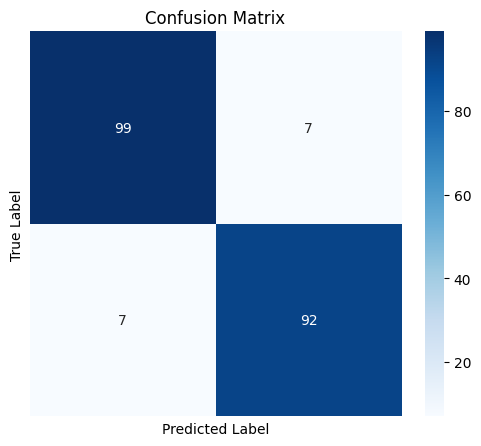

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


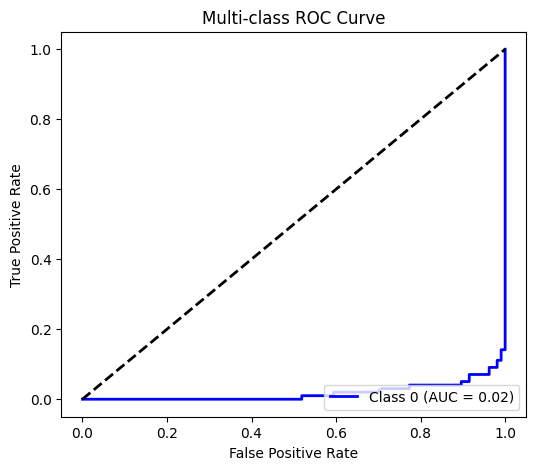

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


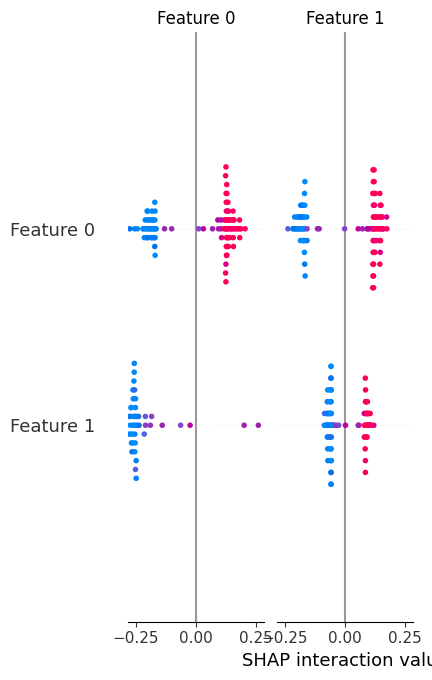

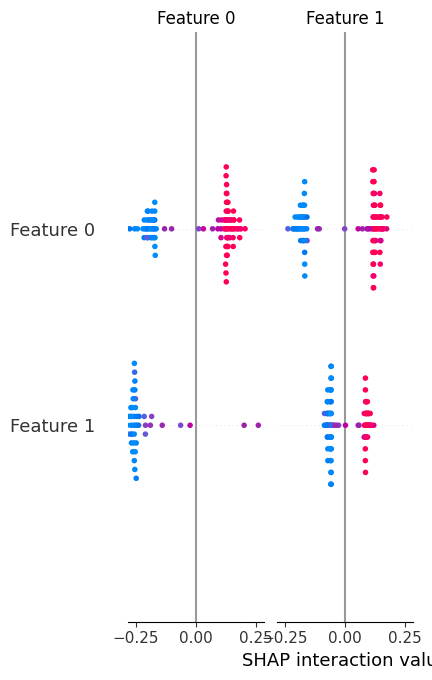

In [1]:
#Meta Learner
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import shap
from itertools import cycle

# Paths
test_images_path = "/content/drive/MyDrive/skin cancer detection/test/images"
test_labels_path = "/content/drive/MyDrive/skin cancer detection/test/labels"
train_images_path = "/content/drive/MyDrive/skin cancer detection/train/images"
train_labels_path = "/content/drive/MyDrive/skin cancer detection/train/labels"
valid_images_path = "/content/drive/MyDrive/skin cancer detection/valid/images"
valid_labels_path = "/content/drive/MyDrive/skin cancer detection/valid/labels"

# Load labels
def load_labels(labels_dir):
    labels = []
    label_files = sorted(os.listdir(labels_dir))
    for label_file in label_files:
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as file:
            first_value = file.read().strip().split()[0]
            labels.append(int(float(first_value)))
    return np.array(labels)

# Load images and extract features using ResNet50
def load_images_and_extract_features(images_path, labels_path, model):
    images = []
    labels = load_labels(labels_path)
    image_files = sorted(os.listdir(images_path))
    for img_name in image_files:
        img_path = os.path.join(images_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
    images = np.array(images)
    features = model.predict(images)
    return features, labels

# Load pre-trained ResNet50 model for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Load datasets
X_train, y_train = load_images_and_extract_features(train_images_path, train_labels_path, feature_extractor)
X_valid, y_valid = load_images_and_extract_features(valid_images_path, valid_labels_path, feature_extractor)
X_test, y_test = load_images_and_extract_features(test_images_path, test_labels_path, feature_extractor)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train base models
svm = SVC(kernel='linear', probability=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

svm.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Get predictions from base models
y_pred_svm = svm.predict_proba(X_train_scaled)
y_pred_knn = knn.predict_proba(X_train_scaled)
y_pred_rf = rf.predict_proba(X_train_scaled)

# Stack predictions as input for meta-learner
meta_X_train = np.hstack((y_pred_svm, y_pred_knn, y_pred_rf))

# Repeat for test data
y_pred_svm_test = svm.predict_proba(X_test_scaled)
y_pred_knn_test = knn.predict_proba(X_test_scaled)
y_pred_rf_test = rf.predict_proba(X_test_scaled)
meta_X_test = np.hstack((y_pred_svm_test, y_pred_knn_test, y_pred_rf_test))

# Define FFN Meta-Learner
meta_model = Sequential([
    Dense(32, activation='relu', input_shape=(meta_X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

meta_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the meta-learner
meta_model.fit(meta_X_train, y_train, epochs=20, batch_size=16, validation_data=(meta_X_test, y_test))

# Evaluate the meta-learner
y_pred_meta = np.argmax(meta_model.predict(meta_X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred_meta)
print(f"\nMeta-Learner Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_meta))

# Confusion Matrix (without class labels)
conf_matrix = confusion_matrix(y_test, y_pred_meta)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=False, yticklabels=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_meta_prob = meta_model.predict(meta_X_test)

n_classes = y_test_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

plt.figure(figsize=(6, 5))
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_meta_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# SHAP Explainability
def explain_model(model, X_test):
    explainer = shap.KernelExplainer(model.predict, X_test[:100])
    shap_values = explainer.shap_values(X_test[:100])
    shap.summary_plot(shap_values, X_test[:100], plot_type="bar")
    shap.summary_plot(shap_values, X_test[:100])

# Call SHAP function
explain_model(meta_model, meta_X_test)
